# Download and Fetch Dataset
----

## Download Dataset

In [1]:
import os
import urllib

DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases"
IRIS_DATASET_PATH = os.path.join("dataset", "iris")
IRIS_DATASET_URL = DOWNLOAD_ROOT + "/iris/iris.data"

def download_iris_flower_dataset(iris_dataset_url = IRIS_DATASET_URL, iris_dataset_path = IRIS_DATASET_PATH):
    if not os.path.isdir(iris_dataset_path):
        os.makedirs(iris_dataset_path)
        dataset_path= os.path.join(iris_dataset_path, "iris.data")
        urllib.request.urlretrieve(iris_dataset_url, dataset_path)

download_iris_flower_dataset()

## Fetch Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
sns.set_style('dark')

def fetch_dataset(iris_dataset_path = IRIS_DATASET_PATH, columns=None):
    dataset_path = os.path.join(iris_dataset_path,'iris.data')
    return pd.read_csv(dataset_path, header=columns)

iris_df = fetch_dataset()

----

# EDA (Exploratory Data Analysis)
----
## Quick Look

In [3]:
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


As seen from the returned subset (top 5) of dataframe by using head() method, features name are represented by integer ranging from 0 to 4. It can be changed by assigning list of feature name in the columns attribute of the dataframe.

In [4]:
iris_df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' ,'petal width (cm)' ,'species']
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

----

In [5]:
# shape, dimension, datatype
iris_df.shape, iris_df.ndim, type(iris_df)

((150, 5), 2, pandas.core.frame.DataFrame)

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation:
* Dataset contains 150 samples/rows.
* 5 columns/features 
* Because we fetched dataset using pandas read_csv method the datatype is pandas.core.frame.DataFrame.
* There are no missing values in the dataset.
* All the features data type is float except species (object/string)

----
## Summary statistics of the numerical features in the dataset

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


----
## Visual EDA (Exploratory Data Analysis)

### Count plot

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64


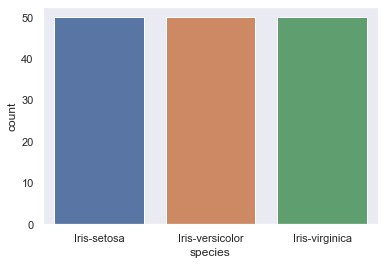

In [8]:
print(iris_df['species'].value_counts())
sns.countplot(x='species', data=iris_df)

Observations:
* Iris flower data set is a balanced dataset.
* Dataset contains equal number of samples for each species.
----

### Swarmplot

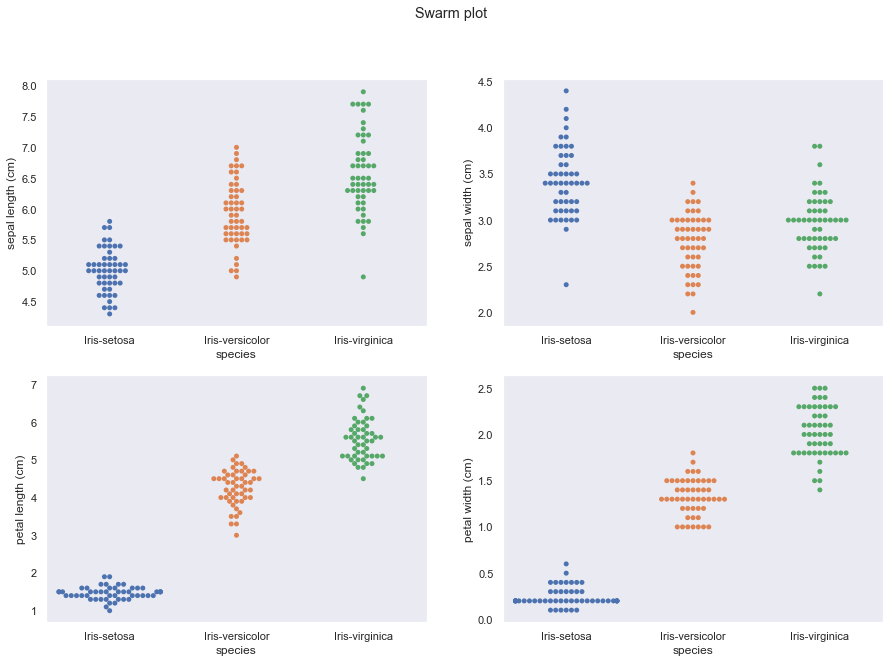

In [9]:
# Univariate analysis
plt.figure(figsize=(15, 10))
plt.suptitle('Swarm plot')
sns.swarmplot(x='species', y='sepal length (cm)', data=iris_df, ax=plt.subplot(2,2,1))
sns.swarmplot(x='species', y='sepal width (cm)', data=iris_df, ax=plt.subplot(2,2,2))
sns.swarmplot(x='species', y='petal length (cm)', data=iris_df, ax=plt.subplot(2,2,3))
sns.swarmplot(x='species', y='petal width (cm)', data=iris_df, ax=plt.subplot(2,2,4))

Observations:
* Iris-setosa is easier to distinct from other species (iris-versicolor, iris-virginica) by looking at the petal length and width.
* There is wide variation in sepal width and length of each species compared to the petal width and length.
---

### Box and Whisker plot

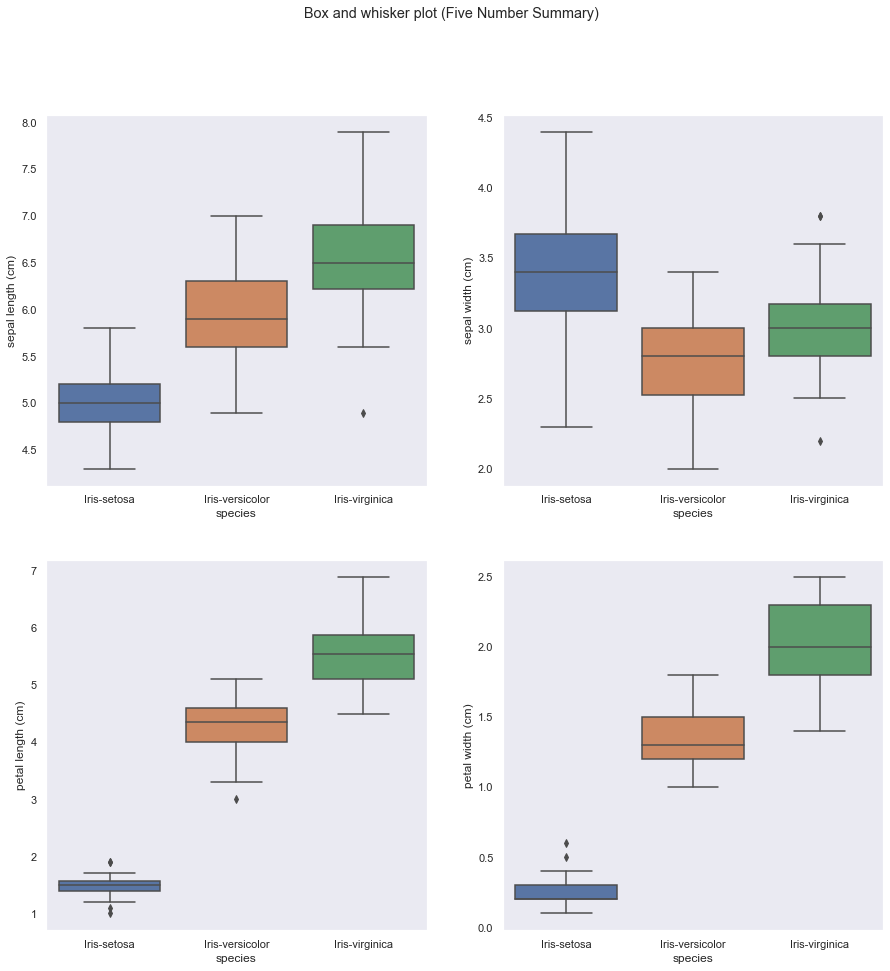

In [10]:
plt.figure(figsize=(15,15))
plt.suptitle('Box and whisker plot (Five Number Summary)')
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df, ax=plt.subplot(2,2,1))
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df, ax=plt.subplot(2,2,2))
sns.boxplot(x='species', y='petal length (cm)', data=iris_df, ax=plt.subplot(2,2,3))
sns.boxplot(x='species', y='petal width (cm)', data=iris_df, ax=plt.subplot(2,2,4))

----
### Violin Plot

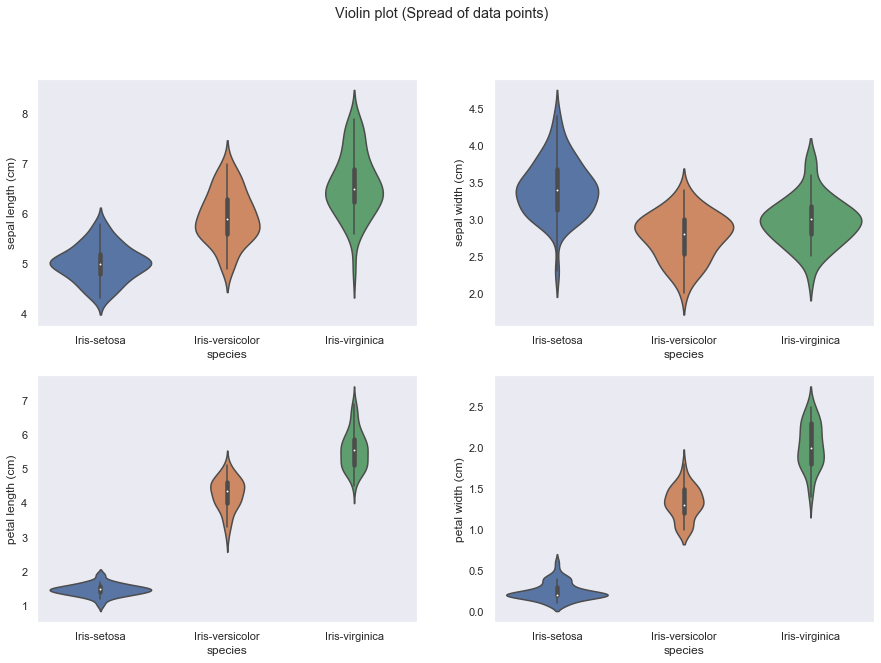

In [11]:
plt.figure(figsize=(15,10))
plt.suptitle('Violin plot (Spread of data points)')
sns.violinplot(x='species', y='sepal length (cm)', data=iris_df, ax=plt.subplot(2,2,1))
sns.violinplot(x='species', y='sepal width (cm)', data=iris_df, ax=plt.subplot(2,2,2))
sns.violinplot(x='species', y='petal length (cm)', data=iris_df, ax=plt.subplot(2,2,3))
sns.violinplot(x='species', y='petal width (cm)', data=iris_df, ax=plt.subplot(2,2,4))

----
### Pair Plot

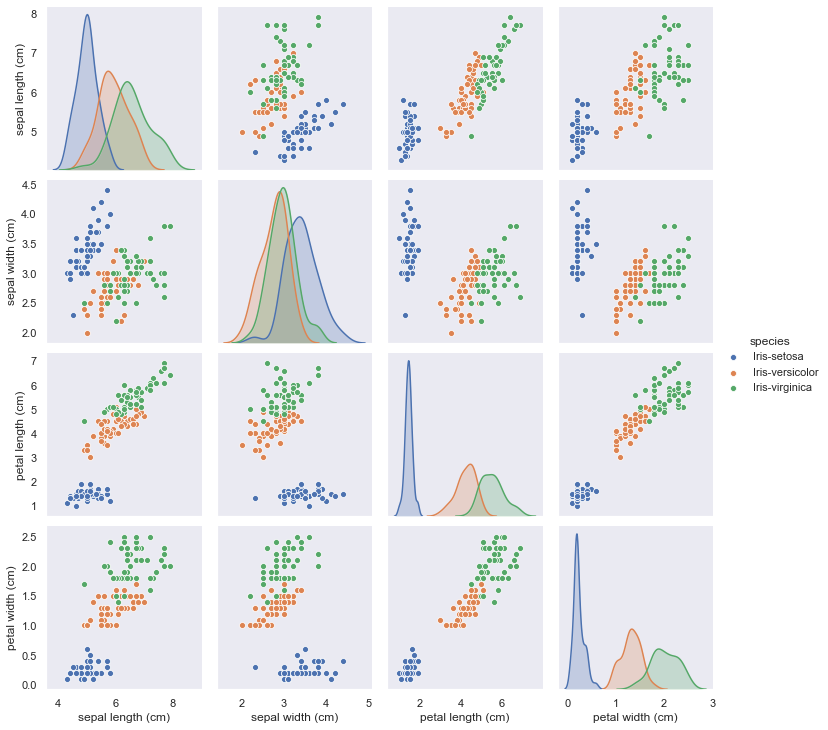

In [12]:
sns.pairplot(iris_df, kind='scatter', hue='species', diag_kind='auto')

Observation:
* There is positive correlation between petal length and width.

----
#### Petal Length and Width Scatter Plot

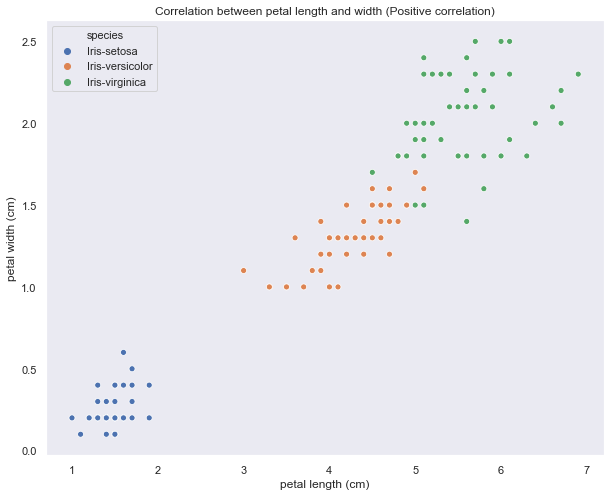

In [13]:
plt.figure(figsize=(10,8))
plt.title('Correlation between petal length and width (Positive correlation)')
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df)

----
### Correlation Matrix

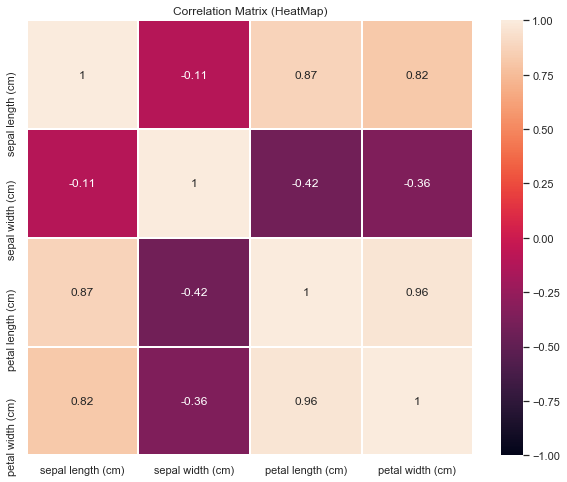

In [14]:
corr_matrix = iris_df.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix (HeatMap)')
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=1, annot=True)

----
# Machine Learning

----
## Imports

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

----
## Initializing performance metrics

In [16]:
scorer = make_scorer(f1_score, average='macro')

----
## Train-Test Split

In [17]:
# X_train, X_test, y_train, y_test = train_test_split()
X = iris_df.drop("species", axis=1)
y = iris_df["species"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

----
## Model selection based on performance score

In [18]:
models = [
    ('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('SVM', SVC(gamma='auto')),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('LDR', LinearDiscriminantAnalysis())
]
scores = []
scores_mean = []
scores_std = []
model_names = []
Kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=24)

for name, model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=Kfold, scoring=scorer)
    scores.append(cv_score)
    scores_mean.append(np.mean(cv_score))
    scores_std.append(np.std(cv_score))
    model_names.append(name)
    
cv_score_df = pd.DataFrame({
    'model': model_names,
    'cv_score': scores,
    'mean': scores_mean,
    'std': scores_std
})

cv_score_df.sort_values("mean", ascending=False)

,model,cv_score,mean,std
1,SVM,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9153439153439153, ...",0.983069,0.033862
4,KNN,"[1.0, 1.0, 1.0, 0.9153439153439153, 1.0, 0.915...",0.974603,0.038794
5,LDR,"[1.0, 0.9153439153439153, 1.0, 0.9153439153439...",0.974603,0.038794
3,NB,"[1.0, 0.9153439153439153, 1.0, 0.9153439153439...",0.957672,0.042328
0,LogReg,"[1.0, 0.9153439153439153, 1.0, 1.0, 1.0, 1.0, ...",0.948624,0.068791
2,CART,"[1.0, 0.9153439153439153, 1.0, 0.8333333333333...",0.940159,0.067136


Observation:
* SVM score (0.983069) is higher than rest of the classifier model.

----

## Training model with training data and testing

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      0.97      0.99        40
 Iris-virginica       0.98      1.00      0.99        40

       accuracy                           0.99       120
      macro avg       0.99      0.99      0.99       120
   weighted avg       0.99      0.99      0.99       120



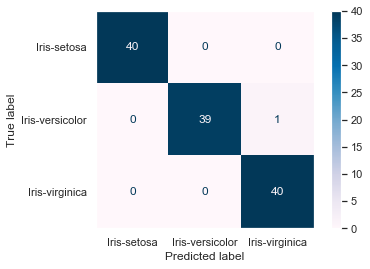

In [19]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
train_pred = svm_model.predict(X_train)
print(classification_report(y_train, train_pred))
plot_confusion_matrix(svm_model, X_train, y_train, cmap=plt.cm.PuBu)

----
### Learning Curve

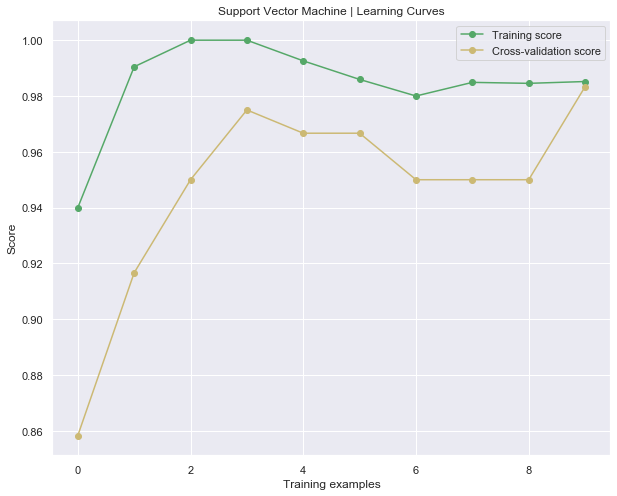

In [20]:
def draw_learning_curves(X, y, estimator, name, num_trainings):
    _, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=Kfold, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.title("{} | Learning Curves".format(name))
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

draw_learning_curves(X_train, y_train, svm_model, 'Support Vector Machine', 10)

----
## Testing model on test data

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



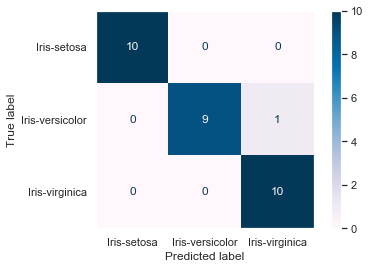

In [21]:
test_pred = svm_model.predict(X_test)
print(classification_report(y_test, test_pred))
plot_confusion_matrix(svm_model, X_test, y_test, cmap=plt.cm.PuBu)